In [ ]:
# Downloaded data from https://www.ssa.gov/oact/babynames/limits.html

In [9]:
!ls -lh national_names

total 50496
-rwxr-xr-x@ 1 ganglion  staff   309K Apr  5 17:57 NationalReadMe.pdf
-rwxr-xr-x@ 1 ganglion  staff    24K Apr  5 17:49 yob1880.txt
-rwxr-xr-x@ 1 ganglion  staff    24K Apr  5 17:49 yob1881.txt
-rwxr-xr-x@ 1 ganglion  staff    26K Apr  5 17:49 yob1882.txt
-rwxr-xr-x@ 1 ganglion  staff    25K Apr  5 17:49 yob1883.txt
-rwxr-xr-x@ 1 ganglion  staff    28K Apr  5 17:49 yob1884.txt
-rwxr-xr-x@ 1 ganglion  staff    28K Apr  5 17:49 yob1885.txt
-rwxr-xr-x@ 1 ganglion  staff    29K Apr  5 17:49 yob1886.txt
-rwxr-xr-x@ 1 ganglion  staff    29K Apr  5 17:49 yob1887.txt
-rwxr-xr-x@ 1 ganglion  staff    32K Apr  5 17:49 yob1888.txt
-rwxr-xr-x@ 1 ganglion  staff    32K Apr  5 17:49 yob1889.txt
-rwxr-xr-x@ 1 ganglion  staff    33K Apr  5 17:49 yob1890.txt
-rwxr-xr-x@ 1 ganglion  staff    32K Apr  5 17:49 yob1891.txt
-rwxr-xr-x@ 1 ganglion  staff    36K Apr  5 17:49 yob1892.txt
-rwxr-xr-x@ 1 ganglion  staff    35K Apr  5 17:49 yob1893.txt
-rwxr-xr-x@ 1 ganglion  staff    36K Apr  5 17:49 y

In [1]:
!head national_names/yob1880.txt

In [ ]:
# data is in csv. Importing into pandas

In [11]:
import pandas as pd

In [16]:
names1880 = pd.read_csv('national_names/yob1880.txt',
                       names=['name', 'sex', 'births'])

In [17]:
# these data contain only names with at least 5 occurences in each year

In [18]:
names1880

,name,sex,births
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746
5,Margaret,F,1578
6,Ida,F,1472
7,Alice,F,1414
8,Bertha,F,1320
9,Sarah,F,1288


In [22]:
# number of births by sex in 1880

names1880.groupby('sex').births.sum()

sex
F     90994
M    110490
Name: births, dtype: int64

In [179]:
# read each csv file (its split up by year)
years = range(1880, 2011)
pieces = []
columns = ['names', 'sex', 'births']

for year in years:
    path = './national_names/yob%d.txt' % year
    frame = pd.read_csv(path, names=columns)
    
    frame['year'] = year
    pieces.append(frame)
    
# concatenate everything into a single dataframe
names = pd.concat(pieces, ignore_index=True)
names

,names,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
5,Margaret,F,1578,1880
6,Ida,F,1472,1880
7,Alice,F,1414,1880
8,Bertha,F,1320,1880
9,Sarah,F,1288,1880


In [180]:
# what is the total birth per year?
total_births = names.pivot_table('births', index='year',
                                columns='sex', aggfunc=sum)
total_births

sex,F,M
year,,
1880,90994,110490
1881,91953,100743
1882,107847,113686
1883,112319,104625
1884,129019,114442
1885,133055,107799
1886,144533,110785
1887,145981,101412
1888,178622,120851


In [181]:
%matplotlib inline

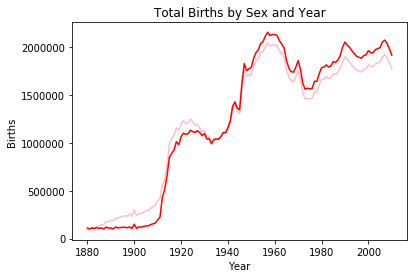

In [182]:
import matplotlib.pyplot as plt
plt.title('Total Births by Sex and Year')
plt.xlabel('Year')
plt.ylabel('Births')
plt.plot(total_births['F'], c='pink')
plt.plot(total_births['M'], c='red')

what is the fraction of babies given each name relative to the total number of births?

In [183]:
# group the data by year and sex, then add the new column to each group

def add_prop(group):
    group['prop'] = group.births / group.births.sum()
    return group

names = names.groupby(['year', 'sex']).apply(add_prop)

# a value of 0.02 would indicate that 2 out of every 100 babies were
# given a particular name
names

,names,sex,births,year,prop
0,Mary,F,7065,1880,0.077642
1,Anna,F,2604,1880,0.028617
2,Emma,F,2003,1880,0.022012
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
5,Margaret,F,1578,1880,0.017342
6,Ida,F,1472,1880,0.016177
7,Alice,F,1414,1880,0.015539
8,Bertha,F,1320,1880,0.014506
9,Sarah,F,1288,1880,0.014155


In [184]:
# sanity check on proportion column 
names.groupby(['year', 'sex']).prop.sum()

year  sex
1880  F      1.0
      M      1.0
1881  F      1.0
      M      1.0
1882  F      1.0
      M      1.0
1883  F      1.0
      M      1.0
1884  F      1.0
      M      1.0
1885  F      1.0
      M      1.0
1886  F      1.0
      M      1.0
1887  F      1.0
      M      1.0
1888  F      1.0
      M      1.0
1889  F      1.0
      M      1.0
1890  F      1.0
      M      1.0
1891  F      1.0
      M      1.0
1892  F      1.0
      M      1.0
1893  F      1.0
      M      1.0
1894  F      1.0
      M      1.0
            ... 
1996  F      1.0
      M      1.0
1997  F      1.0
      M      1.0
1998  F      1.0
      M      1.0
1999  F      1.0
      M      1.0
2000  F      1.0
      M      1.0
2001  F      1.0
      M      1.0
2002  F      1.0
      M      1.0
2003  F      1.0
      M      1.0
2004  F      1.0
      M      1.0
2005  F      1.0
      M      1.0
2006  F      1.0
      M      1.0
2007  F      1.0
      M      1.0
2008  F      1.0
      M      1.0
2009  F      1.0
    

In [185]:
# focusing on top 10,000 names

def get_top5k(group):
    return group.sort_values(by = 'births', ascending = False)[:5000]
grouped = names.groupby(['year', 'sex'])
top5k = grouped.apply(get_top5k)

# drop unneeded group index
top5k.reset_index(inplace=True, drop=True)
top5k

,names,sex,births,year,prop
0,Mary,F,7065,1880,0.077642
1,Anna,F,2604,1880,0.028617
2,Emma,F,2003,1880,0.022012
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
5,Margaret,F,1578,1880,0.017342
6,Ida,F,1472,1880,0.016177
7,Alice,F,1414,1880,0.015539
8,Bertha,F,1320,1880,0.014506
9,Sarah,F,1288,1880,0.014155


# Naming trends

In [90]:
girls = top5k[top5k.sex == 'F']
boys = top5k[top5k.sex == 'M']

In [201]:
total_births = top5k.pivot_table('births', index='year',
                                columns='names',aggfunc=sum)

In [202]:
total_births.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 131 entries, 1880 to 2010
Columns: 38664 entries, Aadan to Zyshonne
dtypes: float64(38664)
memory usage: 38.6 MB


look at specific names

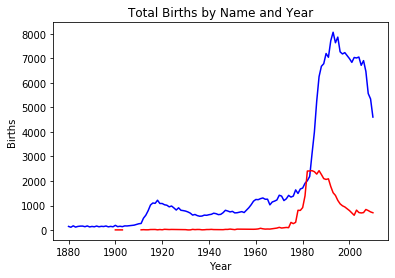

In [206]:
plt.title('Total Births by Name and Year')
plt.xlabel('Year')
plt.ylabel('Births')

plt.plot(total_births[['Alex']], c='blue')
plt.plot(total_births[['Lacey']], c='red')
#plt.plot(total_births[['Donna']], c='orange')

# Naming diversity

There appears to be a decreae in the total proportion of the top 5,000 names. This likely represents increasing name diversity

In [119]:
table = top5k.pivot_table('prop', index='year',
                         columns='sex', aggfunc=sum)

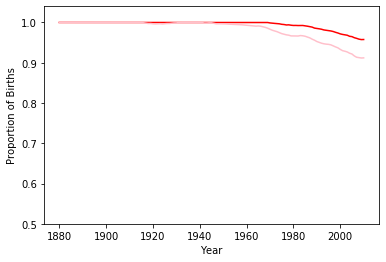

In [139]:
# higher diversity in female names 
plt.ylim(0.5, 1.04)
plt.xlabel('Year')
plt.ylabel('Proportion of Births')
plt.plot(table['M'], c='red')
plt.plot(table['F'], c='pink')

# Boy names that become girl names (and vice versa)

In [141]:
all_names = pd.Series(top5k.names.unique())

In [153]:
alex_like = all_names[all_names.str.lower().str.contains('alex')]

In [156]:
filtered = top5k[top5k.names.isin(alex_like)]

In [159]:
filtered.groupby('names').births.sum()

names
Alex           254402
Alexa           90982
Alexah            131
Alexand             5
Alexandar         452
Alexande          301
Alexander      563646
Alexandera        118
Alexanderia       479
Alexandr          421
Alexandra      209790
Alexandre        3966
Alexandrea       7788
Alexandria      87154
Alexandrina        18
Alexandrine        11
Alexandro        5718
Alexandros       1174
Alexandru         260
Alexandrya         23
Alexas            634
Alexavier        1110
Alexcia          1232
Alexcis            52
Alexea             24
Alexei            751
Alexes            486
Alexey             24
Alexi            4601
Alexia          35028
                ...  
Alexie           1275
Alexina           198
Alexine            79
Alexio             13
Alexis         362406
Alexiss           316
Alexius          1395
Alexiz             52
Alexnader           9
Alexsa            190
Alexsander        908
Alexsandra       1989
Alexsandro         82
Alexsia            83
Alex

In [160]:
table = filtered.pivot_table('births', index='year', columns ='sex',
                            aggfunc='sum')

In [162]:
table = table.div(table.sum(1), axis=0)

In [168]:
table.head()

sex,F,M
year,,
1880,NaN,1.000000
1881,NaN,1.000000
1882,0.012255,0.987745
1883,NaN,1.000000
1884,0.012853,0.987147


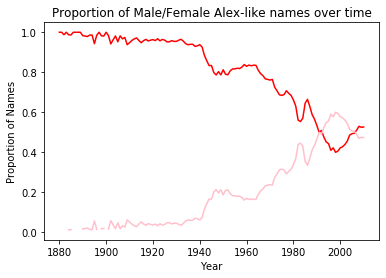

In [170]:
plt.xlabel('Year')
plt.ylabel('Proportion of Names')
plt.title('Proportion of Male/Female Alex-like names over time')
plt.plot(table['M'], c='red')
plt.plot(table['F'], c='pink')

# Least common names

In [187]:
#Sort by least common names and organize by year

def sort_and_group(group):
    return group.sort_values(by = 'births', ascending = True)

grouped = names.groupby(['year', 'sex'])
names = grouped.apply(sort_and_group)

In [209]:
names2010 = names[names.year == 2010]
names2010[names2010.sex == 'M'][:50]

names sex  births  year      prop
year sex                                               
2010 M   1692111      Zzyzx   M       5  2010  0.000003
         1690745   Gabriyel   M       5  2010  0.000003
         1690746        Gad   M       5  2010  0.000003
         1690747     Gaetan   M       5  2010  0.000003
         1690748   Garfield   M       5  2010  0.000003
         1690749    Garritt   M       5  2010  0.000003
         1690750    Garvens   M       5  2010  0.000003
         1690751     Garytt   M       5  2010  0.000003
         1690752     Gasper   M       5  2010  0.000003
         1690753  Gaudencio   M       5  2010  0.000003
         1690754   Gedaliah   M       5  2010  0.000003
         1690755     Gemari   M       5  2010  0.000003
         1690756   Geoffery   M       5  2010  0.000003
         1690757    Georgiy   M       5  2010  0.000003
         1690758     Gerron   M       5  2010  0.000003
         1690759      Gevon   M       5  2010  0.000003
         1690760     Gevorg   M       5  2010  0.000003
         1690761  Giankarlo   M       5  2010  0.000003
         1690762  Gianpiero   M       5  2010  0.000003
         1690763    Gillian   M       5  2010  0.000003
         1690764    Giobany   M       5  2010  0.000003
         1690765    Giordan   M       5  2010  0.000003
         1690766   Giovanne   M       5  2010  0.000003
         1690767   Giovonie   M       5  2010  0.000003
         1690768     Giulio   M       5  2010  0.000003
         1690769     Gradey   M       5  2010  0.000003
         1690770      Graer   M       5  2010  0.000003
         1690771    Graesen   M       5  2010  0.000003
         1690744  Gabriella   M       5  2010  0.000003
         1690743    Gabirel   M       5  2010  0.000003
         1690742     Future   M       5  2010  0.000003
         1690741     Furqan   M       5  2010  0.000003
         1690713      Ezell   M       5  2010  0.000003
         1690714    Ezeriah   M       5  2010  0.000003
         1690715      Eziel   M       5  2010  0.000003
         1690716    Ezikiel   M       5  2010  0.000003
         1690717    Eziquel   M       5  2010  0.000003
         1690718     Ezrael   M       5  2010  0.000003
         1690719     Ezreal   M       5  2010  0.000003
         1690720    Ezykiel   M       5  2010  0.000003
         1690721     Fabion   M       5  2010  0.000003
         1690722      Fadil   M       5  2010  0.000003
         1690723      Falon   M       5  2010  0.000003
         1690724     Famous   M       5  2010  0.000003
         1690725      Farah   M       5  2010  0.000003
         1690772    Grayton   M       5  2010  0.000003
         1690726    Farhaan   M       5  2010  0.000003
         1690728      Faruk   M       5  2010  0.000003
         1690729      Fatih   M       5  2010  0.000003
         1690730      Favor   M       5  2010  0.000003

In [ ]:
# focusing on top 10,000 names

def get_top5k(group):
    return group.sort_values(by = 'births', ascending = False)[:5000]
grouped = names.groupby(['year', 'sex'])
top5k = grouped.apply(get_top5k)

# drop unneeded group index
top5k.reset_index(inplace=True, drop=True)
